In [251]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report

In [2]:
ls

 Volume in drive C is OS
 Volume Serial Number is A09C-8A30

 Directory of C:\Users\Ahmed-Basem\Desktop\Current\Corelia\Task 4

05/09/2023  04:18 PM    <DIR>          .
05/09/2023  04:18 PM    <DIR>          ..
05/09/2023  01:29 PM    <DIR>          .ipynb_checkpoints
05/23/2022  07:24 PM            32,218 cc_approvals.data
05/23/2022  07:24 PM               186 Columns.txt
05/09/2023  04:18 PM           867,839 Untitled.ipynb
               3 File(s)        900,243 bytes
               3 Dir(s)  20,288,659,456 bytes free


In [3]:
with open('Columns.txt') as f:
    lines = f.readlines()

In [4]:
lines = [line.strip() for line in lines]
lines

['Gender',
 'Age',
 'Debt',
 'Married',
 'BankCustomer',
 'EducationLevel',
 'Ethnicity',
 'YearsEmployed',
 'PriorDefault',
 'Employed',
 'CreditScore',
 'DriversLicense',
 'Citizen',
 'ZipCode',
 'Income',
 'Approved']

In [226]:
data = pd.read_csv('cc_approvals.data',names=lines)
data.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [227]:
print(f"There are {data.shape[0]} Rows and data {data.shape[1]} Column")

There are 690 Rows and data 16 Column


In [228]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    object 
 1   Age             690 non-null    object 
 2   Debt            690 non-null    float64
 3   Married         690 non-null    object 
 4   BankCustomer    690 non-null    object 
 5   EducationLevel  690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    object 
 9   Employed        690 non-null    object 
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    object 
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    object 
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


In [229]:
data.isnull().sum()

Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
Approved          0
dtype: int64

In [230]:
def get_insights(col):
    print(f"#### {col} and its data type is *{data[col].dtype}* \n")
    print("Number of ? values",data[col].tolist().count("?"))
    print("\nnumber of unique values",data[col].nunique())
    print(f"\n#### Top 5 values ####")
    print(data[col].value_counts().index.values[:5])
    print(f'\n#### Random Values ####')
    print(data[col].sample(5).values)
    
def count_plot(col,title):
    plt.figure(figsize=(10,6))
    sns.countplot(data=data,x=col)
    plt.xticks(rotation=30)
    plt.title(title)
    plt.show()
def multi_count_plot(col,col2):
    plt.figure(figsize=(10,6))
    sns.countplot(data=data,x=col,hue=col2)
    plt.xticks(rotation=45)
    plt.show()
def pie_plot(col,limit=10,title=''):
    plt.figure(figsize=(10,6))
    plt.pie(x=data[col].value_counts()[:limit],labels=data[col].value_counts()[:limit].index,
           autopct='%1.1f%%')
    plt.title(title)
    plt.show()
def kde_plot(col):
    plt.figure(figsize=(10,6))
    sns.kdeplot(data=data[col],shade=True)
    plt.show()
def scatter_plot(col1,col2,title):
    plt.figure(figsize=(10,6))
    plt.scatter(data[col1], data[col2])
    plt.title(title)
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.show()
def barplot_mean(col,title):
    plt.figure(figsize=(10,6))
    sns.barplot(x=data.groupby('Approved')[col].mean().index,
                y=data.groupby('Approved')[col].mean().values)
    plt.title(title)
    plt.show()
def approved_vs_not(col,Limit=5):
    fig,ax = plt.subplots(figsize=(15,4))
    plt.subplot(1,2,1)
    plt.title('Approved')
    positive = data[data['Approved']=='+']
    plt.pie(positive[col].value_counts()[:Limit],labels=
        positive[col].value_counts()[:Limit].index,
           autopct='%1.1f%%')
    plt.subplot(1,2,2)
    plt.title('Not Approved')
    negative = data[data['Approved']=='-']
    plt.pie(negative[col].value_counts()[:Limit],labels=
        negative[col].value_counts()[:Limit].index,
        autopct ='%1.2f%%' )
    plt.show()   
            

In [231]:
get_insights('Gender')

#### Gender and its data type is *object* 

Number of ? values 12

number of unique values 3

#### Top 5 values ####
['b' 'a' '?']

#### Random Values ####
['b' 'a' 'b' 'b' 'a']


In [232]:
for col in data.columns:
    count = data[col].tolist().count('?')
    if count > 0 :
        print("Column:" , col)
        print(count)

Column: Gender
12
Column: Age
12
Column: Married
6
Column: BankCustomer
6
Column: EducationLevel
9
Column: Ethnicity
9
Column: ZipCode
13


In [233]:
data = data[data['Gender'] != '?']

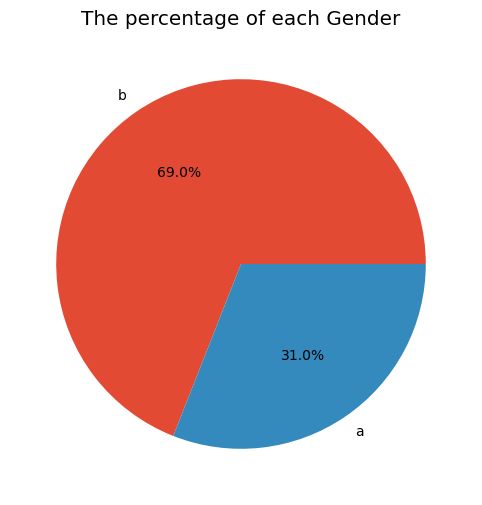

In [234]:
pie_plot('Gender',title="The percentage of each Gender")

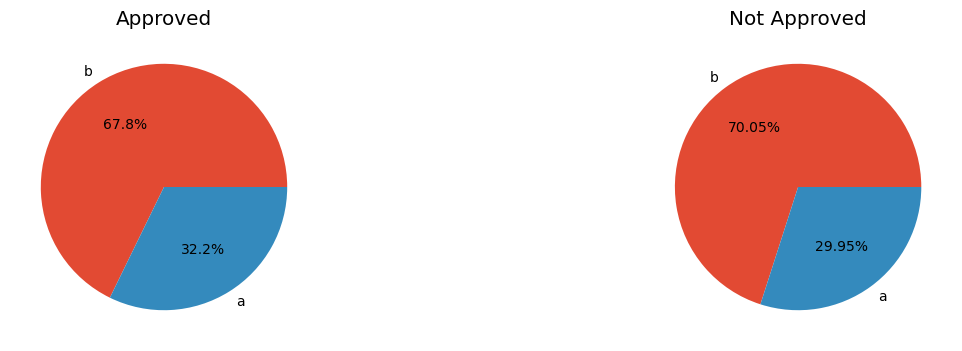

In [236]:
approved_vs_not('Gender')

In [225]:
get_insights('Age')

#### Age and its data type is *float64* 

Number of ? values 0

number of unique values 342

#### Top 5 values ####
[28.375 22.67  20.67  22.5   25.   ]

#### Random Values ####
[54.42  39.17  33.25  28.375 22.92 ]


In [16]:
# let's replace missing of values of age with median
data.loc[data.Age == "?",'Age'] =  data[data['Age'] != "?"]['Age'].median()

In [17]:
data['Age'] = data['Age'].astype(float)

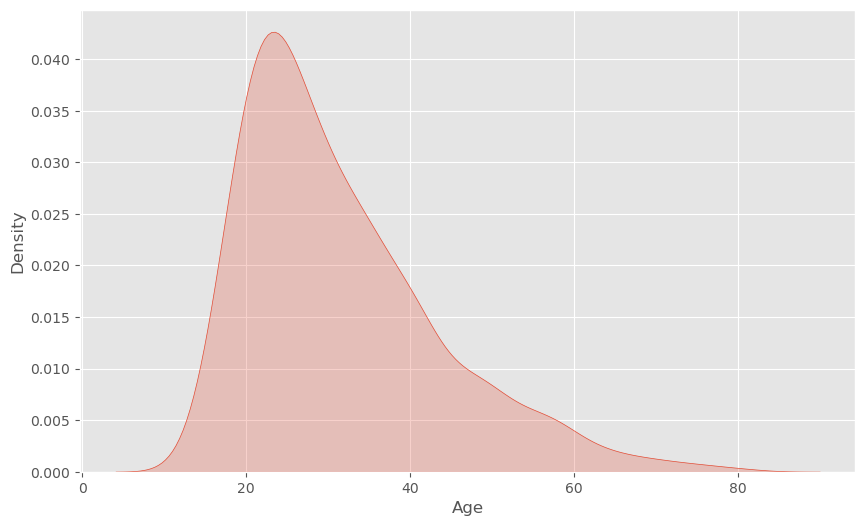

In [18]:
kde_plot('Age')

In [19]:
data['Age'].describe()

count    678.000000
mean      31.520605
std       11.919352
min       13.750000
25%       22.670000
50%       28.375000
75%       37.707500
max       80.250000
Name: Age, dtype: float64

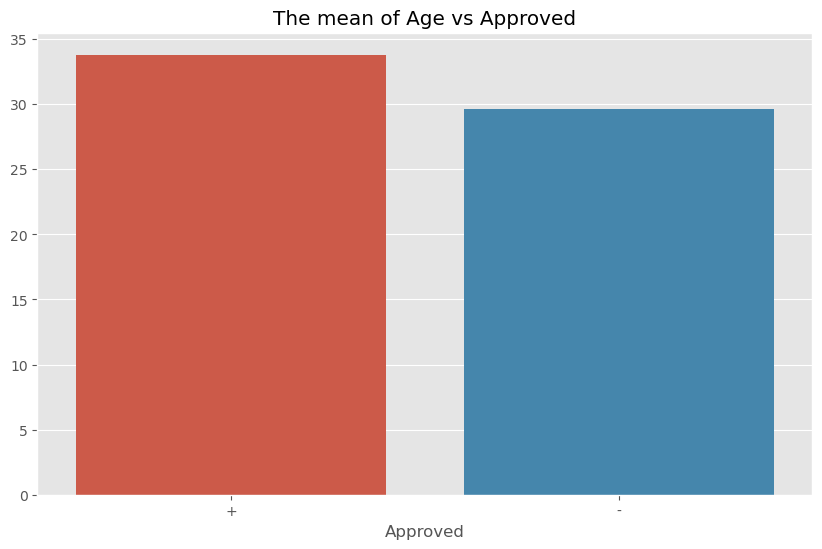

In [20]:
barplot_mean('Age','The mean of Age vs Approved')

### Debt

In [21]:
get_insights('Debt')

#### Debt and its data type is *float64* 

Number of ? values 0

number of unique values 215

#### Top 5 values ####
[1.5  2.5  3.   0.   0.75]

#### Random Values ####
[2.5 2.5 0.  5.5 7. ]


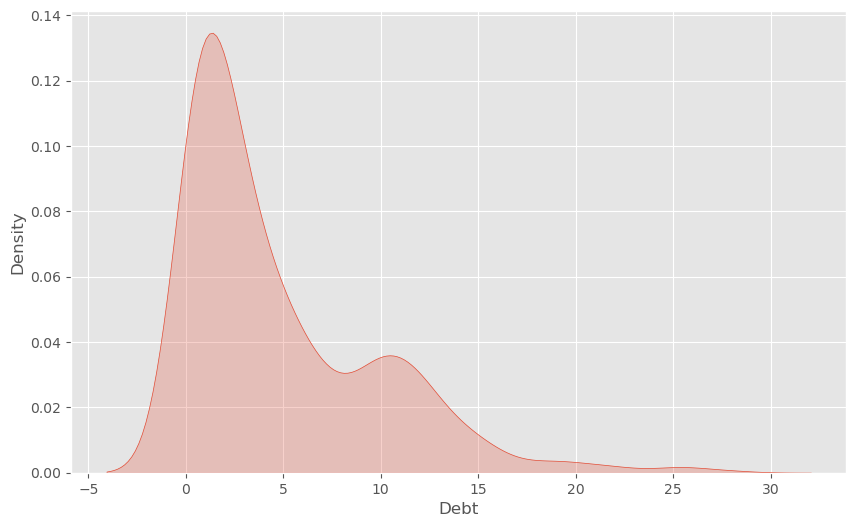

In [22]:
kde_plot('Debt')

In [23]:
get_insights('Married')

#### Married and its data type is *object* 

Number of ? values 6

number of unique values 4

#### Top 5 values ####
['u' 'y' '?' 'l']

#### Random Values ####
['u' 'u' 'u' 'u' 'u']


In [24]:
data.loc[data.Married == "?",:]

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
206,a,71.58,0.0,?,?,?,?,0.0,f,f,0,f,p,?,0,+
270,b,37.58,0.0,?,?,?,?,0.0,f,f,0,f,p,?,0,+
330,b,20.42,0.0,?,?,?,?,0.0,f,f,0,f,p,?,0,-
456,b,34.58,0.0,?,?,?,?,0.0,f,f,0,f,p,?,0,-
592,b,23.17,0.0,?,?,?,?,0.0,f,f,0,f,p,?,0,+
622,a,25.58,0.0,?,?,?,?,0.0,f,f,0,f,p,?,0,+


In [25]:
data = data.loc[data.Married != "?",:]

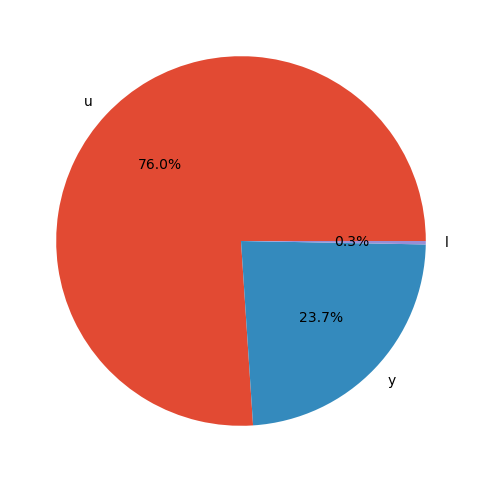

In [26]:
pie_plot('Married')

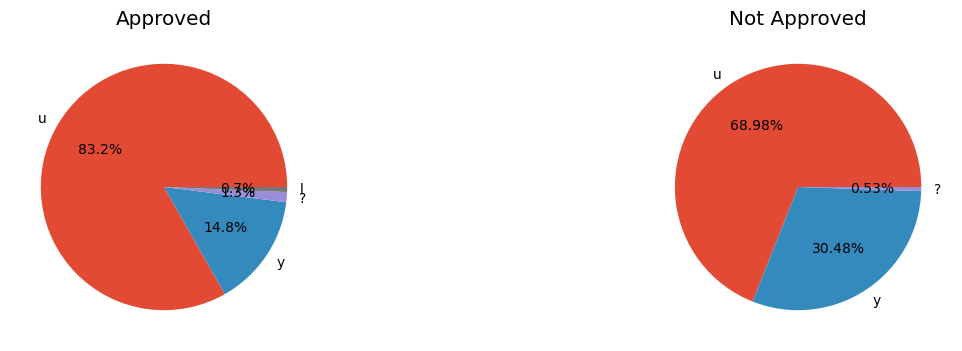

In [238]:
approved_vs_not('Married')

### BankCustomer

In [28]:
get_insights('BankCustomer')

#### BankCustomer and its data type is *object* 

Number of ? values 0

number of unique values 3

#### Top 5 values ####
['g' 'p' 'gg']

#### Random Values ####
['g' 'g' 'g' 'g' 'g']


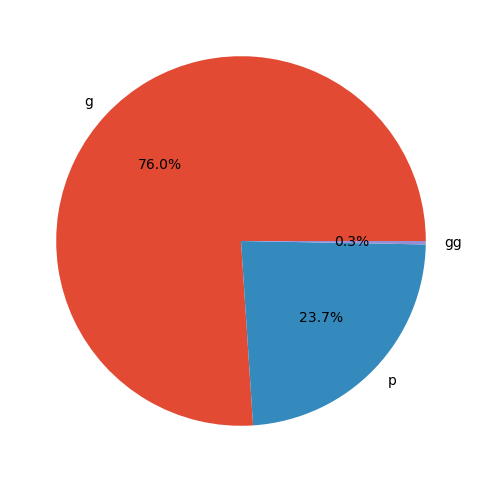

In [29]:
pie_plot('BankCustomer')

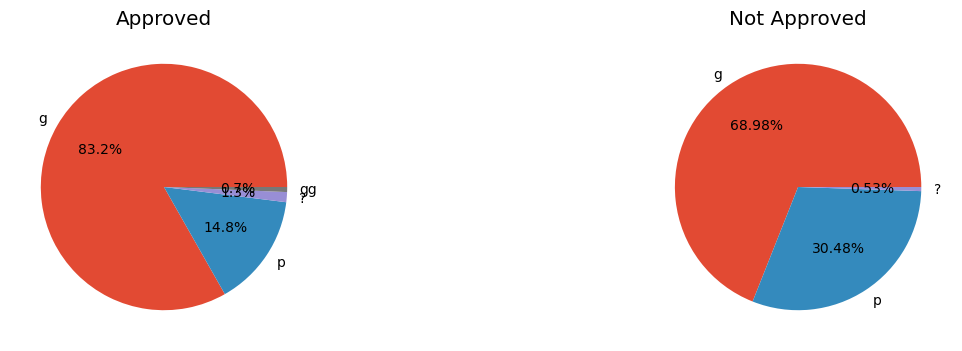

In [239]:
approved_vs_not('BankCustomer')

### EducationLevel

In [31]:
get_insights('EducationLevel')

#### EducationLevel and its data type is *object* 

Number of ? values 1

number of unique values 15

#### Top 5 values ####
['c' 'q' 'w' 'i' 'aa']

#### Random Values ####
['q' 'aa' 'c' '?' 'c']


In [32]:
data = data.loc[data.EducationLevel != "?",:]

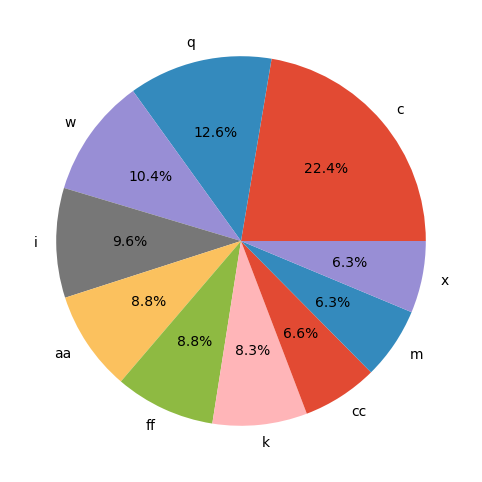

In [33]:
pie_plot('EducationLevel',10)

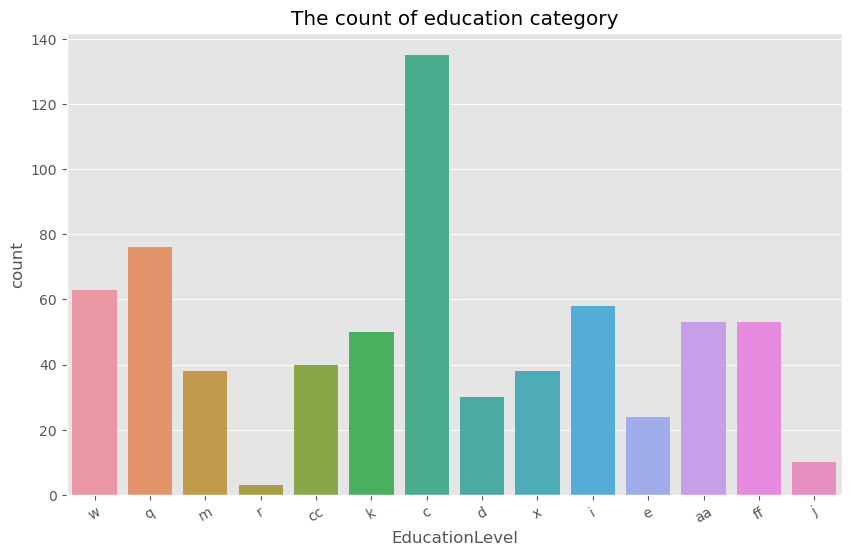

In [34]:
count_plot('EducationLevel','The count of education category')

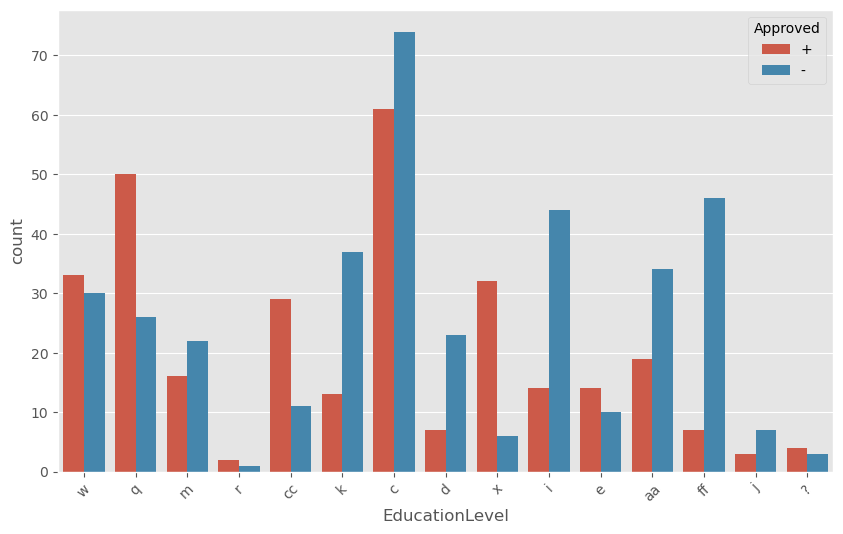

In [241]:
multi_count_plot('EducationLevel','Approved')

### Ethnicity

In [36]:
get_insights('Ethnicity')

#### Ethnicity and its data type is *object* 

Number of ? values 0

number of unique values 9

#### Top 5 values ####
['v' 'h' 'bb' 'ff' 'j']

#### Random Values ####
['bb' 'v' 'v' 'v' 'v']


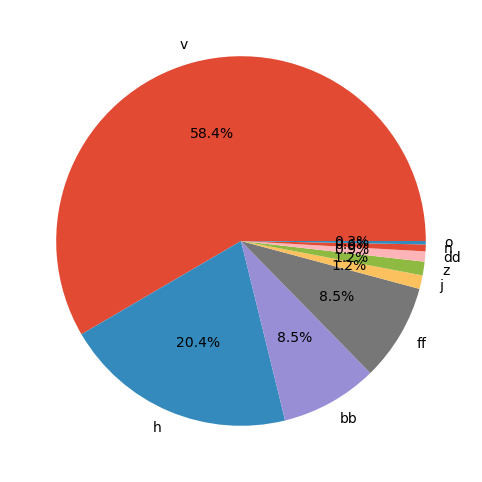

In [37]:
pie_plot('Ethnicity')

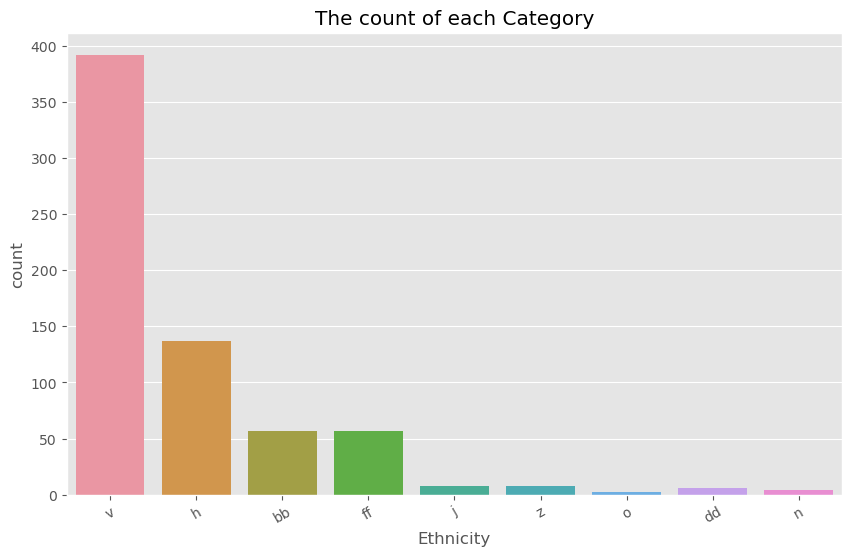

In [38]:
count_plot("Ethnicity","The count of each Category")

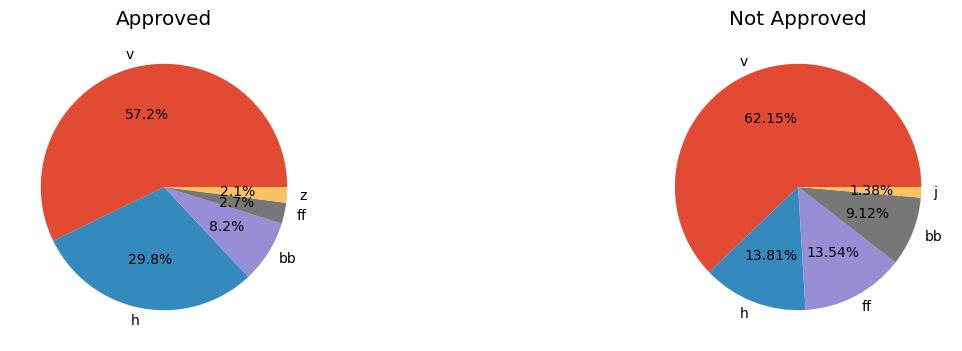

In [242]:
approved_vs_not('Ethnicity')

### YearsEmployed

In [40]:
get_insights('YearsEmployed')

#### YearsEmployed and its data type is *float64* 

Number of ? values 0

number of unique values 132

#### Top 5 values ####
[0.    0.25  0.04  1.    0.125]

#### Random Values ####
[10.     0.165 18.     1.5    0.   ]


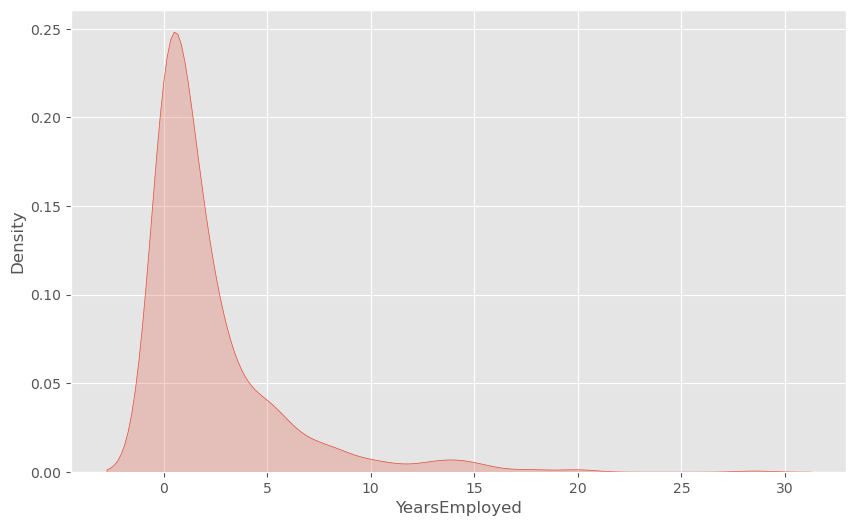

In [41]:
kde_plot('YearsEmployed')

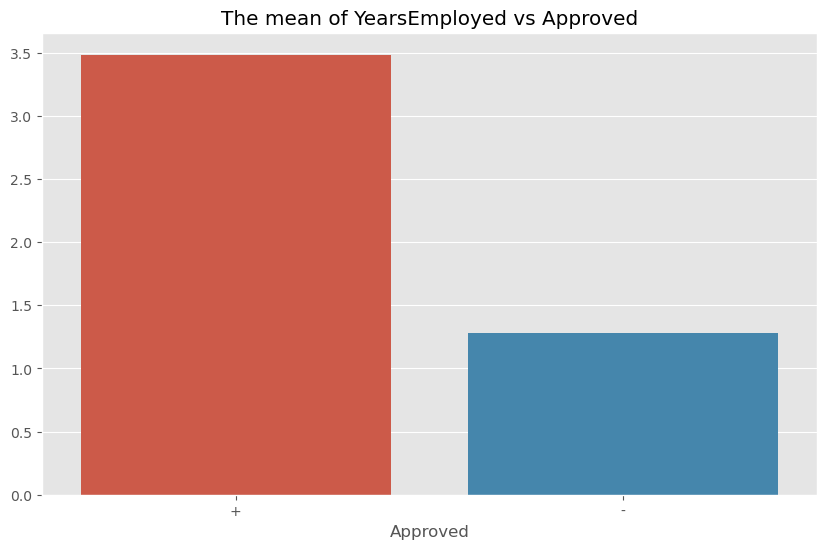

In [42]:
barplot_mean('YearsEmployed',"The mean of YearsEmployed vs Approved")

### PriorDefault

In [43]:
get_insights('PriorDefault')

#### PriorDefault and its data type is *object* 

Number of ? values 0

number of unique values 2

#### Top 5 values ####
['t' 'f']

#### Random Values ####
['f' 't' 'f' 'f' 't']


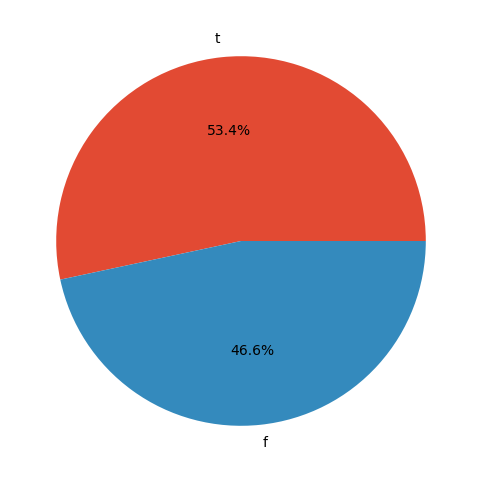

In [44]:
pie_plot('PriorDefault')

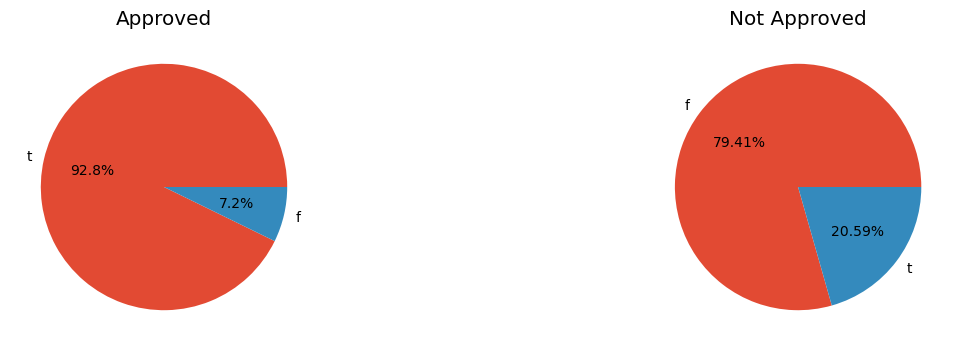

In [243]:
approved_vs_not('PriorDefault')

In [46]:
data.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


### Employed

In [47]:
get_insights('Employed')

#### Employed and its data type is *object* 

Number of ? values 0

number of unique values 2

#### Top 5 values ####
['f' 't']

#### Random Values ####
['f' 'f' 'f' 't' 't']


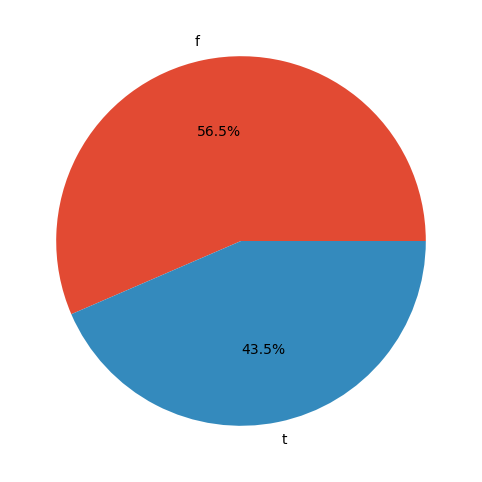

In [48]:
pie_plot('Employed')

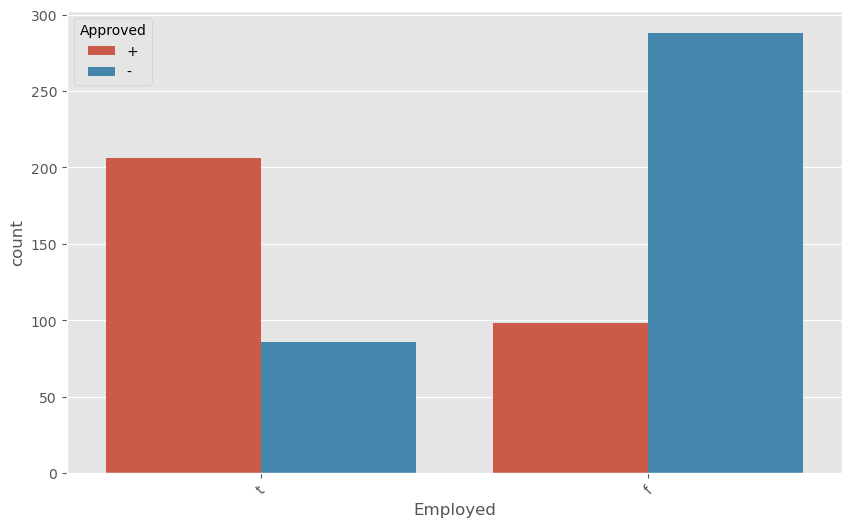

In [245]:
multi_count_plot('Employed','Approved')

### CreditScore

In [50]:
get_insights('CreditScore')

#### CreditScore and its data type is *int64* 

Number of ? values 0

number of unique values 23

#### Top 5 values ####
[0 1 2 3 6]

#### Random Values ####
[ 0 12  0  6  1]


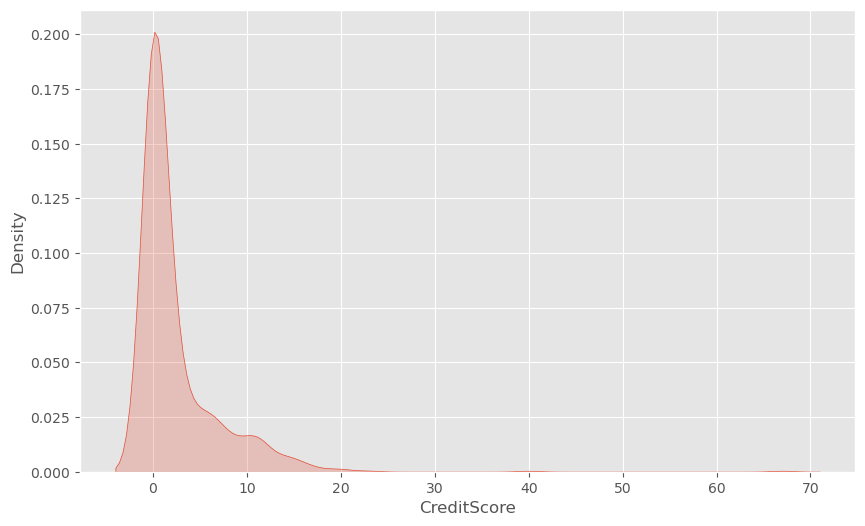

In [51]:
kde_plot('CreditScore')

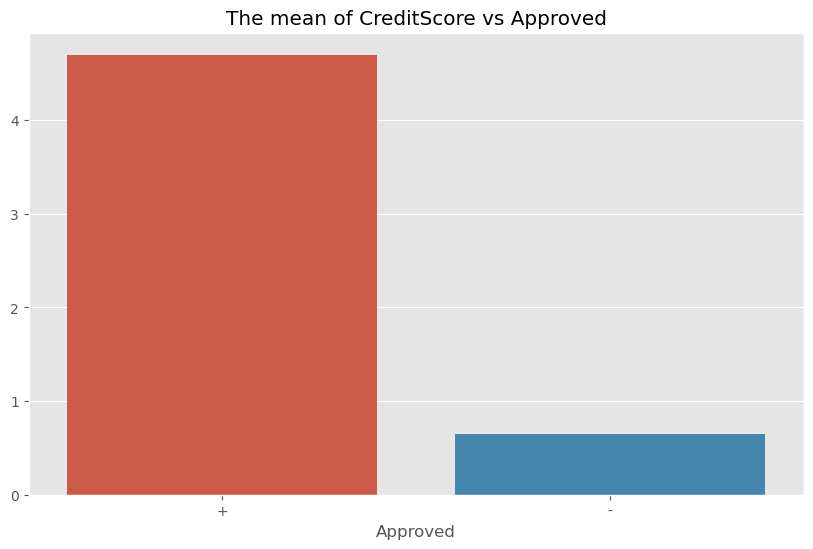

In [52]:
barplot_mean('CreditScore',"The mean of CreditScore vs Approved")

### DriversLicense

In [53]:
get_insights('DriversLicense')

#### DriversLicense and its data type is *object* 

Number of ? values 0

number of unique values 2

#### Top 5 values ####
['f' 't']

#### Random Values ####
['t' 'f' 't' 't' 'f']


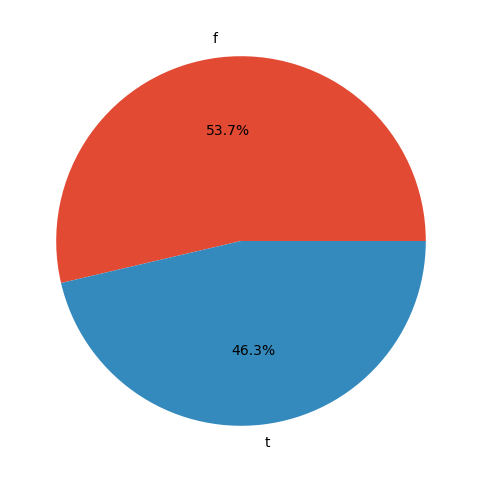

In [54]:
pie_plot('DriversLicense')

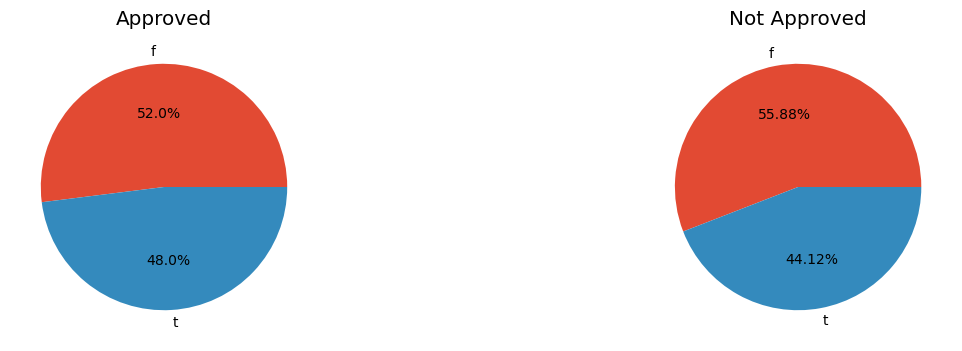

In [246]:
approved_vs_not('DriversLicense')

### Citizen

In [56]:
get_insights('Citizen')

#### Citizen and its data type is *object* 

Number of ? values 0

number of unique values 3

#### Top 5 values ####
['g' 's' 'p']

#### Random Values ####
['g' 'g' 'g' 'g' 'g']


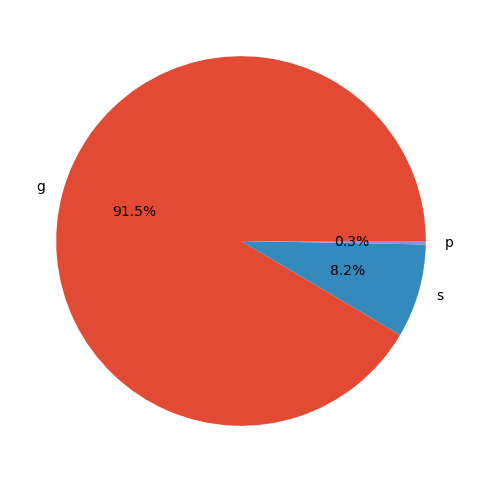

In [57]:
pie_plot('Citizen')

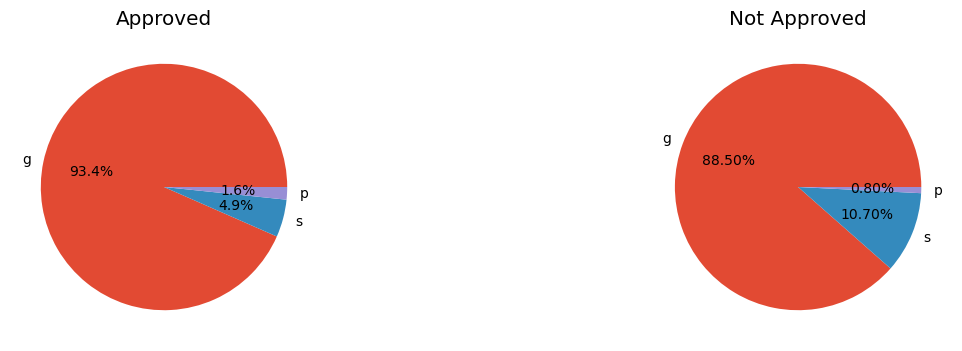

In [247]:
approved_vs_not('Citizen')

### ZipCode

In [59]:
get_insights('ZipCode')

#### ZipCode and its data type is *object* 

Number of ? values 7

number of unique values 167

#### Top 5 values ####
['00000' '00120' '00200' '00160' '00100']

#### Random Values ####
['00000' '00144' '00160' '00480' '00840']


### Income

In [60]:
get_insights('Income')

#### Income and its data type is *int64* 

Number of ? values 0

number of unique values 234

#### Top 5 values ####
[   0    1  500 1000    2]

#### Random Values ####
[   0 2197   53  112    0]


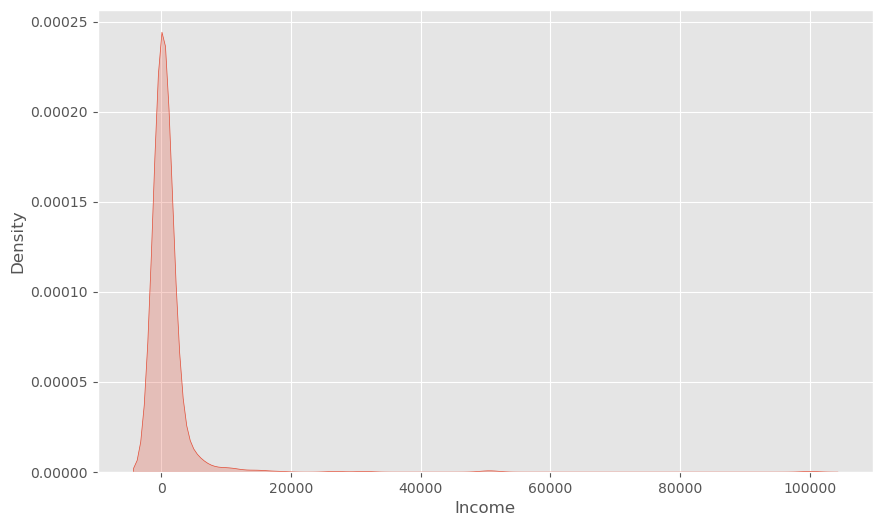

In [61]:
kde_plot('Income')

In [62]:
data.groupby('Approved').mean()['Income']

Approved
+    2081.613333
-     200.649596
Name: Income, dtype: float64

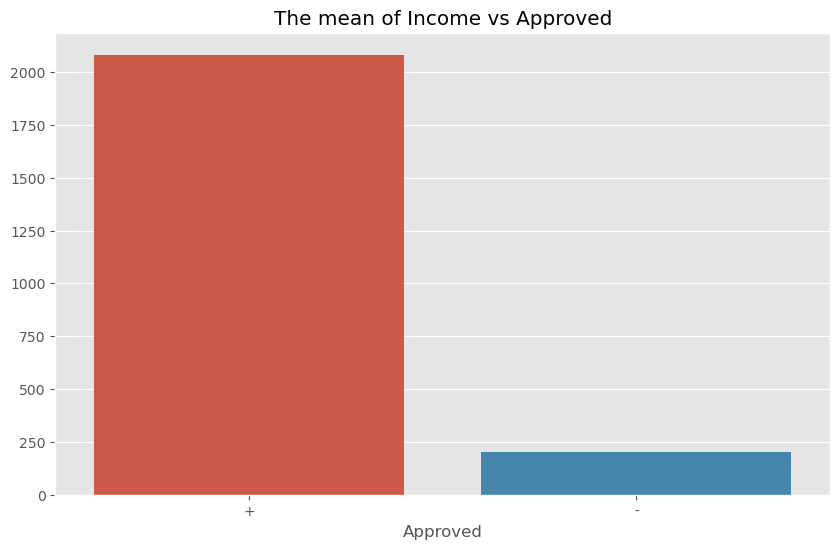

In [63]:
barplot_mean('Income',"The mean of Income vs Approved")

### Approved

In [64]:
get_insights('Approved')

#### Approved and its data type is *object* 

Number of ? values 0

number of unique values 2

#### Top 5 values ####
['-' '+']

#### Random Values ####
['+' '-' '-' '+' '+']


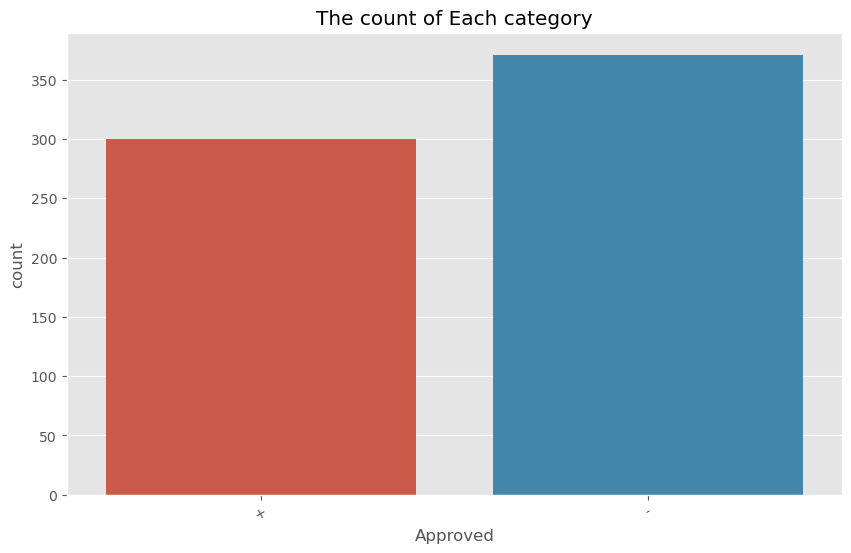

In [65]:
count_plot("Approved","The count of Each category") 

In [66]:
data['Approved'] = data['Approved'].apply(lambda x:1 if x == "+" else 0)

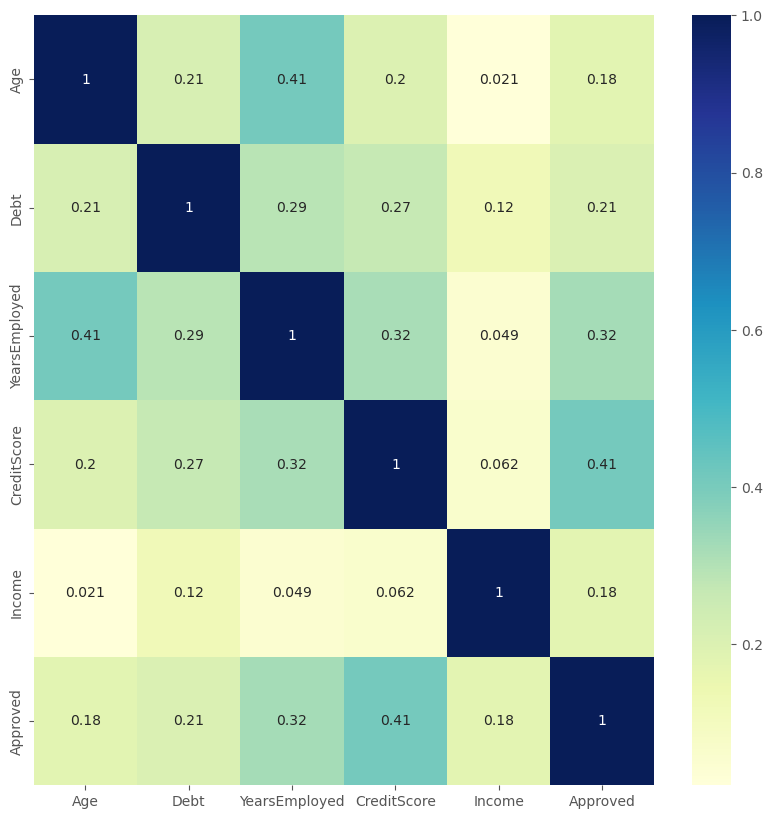

In [67]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),cmap="YlGnBu", annot=True)
plt.show()

In [68]:
X = data.drop('Approved',axis=1)
Y = data['Approved'].values

In [69]:
encoder = LabelEncoder()
X['ZipCode'] = encoder.fit_transform(X['ZipCode'])

In [70]:
X.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,68,0
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,11,560
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,94,824
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,31,3
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,37,0


In [71]:
numerical = [col for col in X.columns if X[col].dtype != "O"]
numerical

['Age', 'Debt', 'YearsEmployed', 'CreditScore', 'ZipCode', 'Income']

In [72]:
categorical = [col for col in X.columns if X[col].dtype == "O"]
categorical

['Gender',
 'Married',
 'BankCustomer',
 'EducationLevel',
 'Ethnicity',
 'PriorDefault',
 'Employed',
 'DriversLicense',
 'Citizen']

In [73]:
for col in categorical:
    print(col + " has : " + str(X[col].nunique()))

Gender has : 2
Married has : 3
BankCustomer has : 3
EducationLevel has : 14
Ethnicity has : 9
PriorDefault has : 2
Employed has : 2
DriversLicense has : 2
Citizen has : 3


In [172]:
transform_pipeline = ColumnTransformer([
    ('num',StandardScaler(),numerical),
    ('category',OneHotEncoder(),categorical)
])

In [294]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=.20,random_state =42)

In [295]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((536, 15), (135, 15), (536,), (135,))

In [296]:
x_train = transform_pipeline.fit_transform(x_train)
x_train.shape

(536, 46)

In [344]:
class LogisticRegression():
    
    def __init__(self,lr,iterations):
        
        self.lr = lr
        self.iterations = iterations
        
    def sigmoid(self,x):
        
        return 1 / (1 + np.exp(-x))
        
    def fit(self,X,Y):
        
        samples_num , features_num = X.shape
        
        self.weights = np.random.rand(features_num)
        self.bais = 1
        
        for i in range(self.iterations):
            y_pred = np.dot(X,self.weights) + self.bais
            y_pred = self.sigmoid(y_pred)
            
            error = y_pred - Y
            dW =   np.sum(X.T.dot(error)) / samples_num
            db = np.sum(error) / samples_num
            
            self.weights -=  dW * self.lr
            self.bais -=  db * self.lr
    
    def predict(self,X):
        net = np.dot(X,self.weights) + self.bais
        net = self.sigmoid(net)
        net = np.round(net)
        return net
    
    def get_accuracy(self,y_true,y_pred):
        correct= 0
        total = len(y_true)
        
        for i in range(total):
            if y_true[i] == y_pred[i]:
                correct +=1
        
        
        accuracy = correct / total
        
        return accuracy

In [345]:
lg = LogisticRegression(0.1,10000)

In [346]:
lg.fit(x_train,y_train)

In [347]:
y_pred = lg.predict(x_train)
print("Training Accuracy is ",lg.get_accuracy(y_train,y_pred))

Training Accuracy is  0.6716417910447762


In [348]:
if x_test.shape[1] < 40:
    x_test = transform_pipeline.transform(x_test)
    x_test.shape

In [349]:
y_pred = lg.predict(x_test)
print("Training Accuracy is ",lg.get_accuracy(y_test,y_pred))

Training Accuracy is  0.6888888888888889


In [350]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.81      0.74        74
           1       0.70      0.54      0.61        61

    accuracy                           0.69       135
   macro avg       0.69      0.68      0.68       135
weighted avg       0.69      0.69      0.68       135



In [273]:
x_train = x_train.T
x_test = x_test.T

In [284]:
INPUT_SHAPE = 46
HIDDEN_SIZE = 50
OUTPUT = 1
LR = 0.1
epochs = 2001

In [285]:
# Define sigmoid activation function
def sigmoid(x):
    return 1 / ( 1 + np.exp(-x))

# Define derivative of sigmoid function
def sigmoid_derivative(x):
    return x * (1 - x)

def ReLU(Z):
    return np.maximum(Z, 0)

def ReLU_deriv(Z):
    return Z > 0

In [286]:
def init_params(input_shape=18, hidden_size=20, output_size=1):
    W1 = np.random.rand(hidden_size, input_shape) 
    b1 = np.random.rand(hidden_size, 1) 
    W2 = np.random.rand(output_size, hidden_size) 
    b2 = np.random.rand(output_size, 1) 
    return W1, b1, W2, b2

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = sigmoid(Z2)
    return Z1, A1, Z2, A2

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    m = X.shape[1]
    dZ2 = A2 - Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2,axis=1)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    
    return dW1, db1, dW2, db2
    

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

def get_mse(y_true, y_pred):
    return (np.square(y_true - y_pred)).mean()

def get_accuracy(y_true, y_pred):
    correct = 0
    total = len(y_true)
    
    for i in range(total):
        if y_true[i] == y_pred[i]:
            correct += 1
    
    accuracy = correct / total
    
    return accuracy

def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    A2 = np.round(A2).squeeze()
    return A2

In [287]:
def gradient_descent(X, Y, alpha, iterations,input_shape, hidden_size, output_size):
    history = {"epoch":[],"loss":[],"accuracy":[]}
    W1, b1, W2, b2 = init_params(input_shape, hidden_size, output_size)
     
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)        
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        cost = get_mse(A2,Y)
        A2 = np.round(A2).squeeze()
        accuracy = get_accuracy(Y,A2)
        history['loss'].append(cost)
        history['epoch'].append(i)
        history['accuracy'].append(accuracy)
        if i % 100 == 0:
            print("Iteration: ", i)
            print("Cost is : ",cost)
            print("Accuracy is :",accuracy)
            print('################ \n')
    return W1, b1, W2, b2,history

In [288]:
W1, b1, W2, b2,history = gradient_descent(x_train, y_train, LR,epochs,
                          input_shape=INPUT_SHAPE, hidden_size=HIDDEN_SIZE, output_size=OUTPUT)

Iteration:  0
Cost is :  0.5541044776119403
Accuracy is : 0.4458955223880597
################ 

Iteration:  100
Cost is :  0.08369183113104886
Accuracy is : 0.8880597014925373
################ 

Iteration:  200
Cost is :  0.08008498989154994
Accuracy is : 0.8880597014925373
################ 

Iteration:  300
Cost is :  0.07678111116119038
Accuracy is : 0.8992537313432836
################ 

Iteration:  400
Cost is :  0.07440970883705943
Accuracy is : 0.8992537313432836
################ 

Iteration:  500
Cost is :  0.07227987670381644
Accuracy is : 0.9029850746268657
################ 

Iteration:  600
Cost is :  0.07044268033404635
Accuracy is : 0.9048507462686567
################ 

Iteration:  700
Cost is :  0.06861373650407661
Accuracy is : 0.9048507462686567
################ 

Iteration:  800
Cost is :  0.06658566125020815
Accuracy is : 0.9123134328358209
################ 

Iteration:  900
Cost is :  0.06435607870805508
Accuracy is : 0.914179104477612
################ 

Iteration:  10

In [289]:
y_pred = make_predictions(x_test, W1, b1, W2, b2)
print("Model Accuracy on Test data :",round(get_accuracy(y_test,y_pred) * 100))

Model Accuracy on Test data : 83


In [290]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84        74
           1       0.81      0.82      0.81        61

    accuracy                           0.83       135
   macro avg       0.83      0.83      0.83       135
weighted avg       0.83      0.83      0.83       135



In [281]:
def plot_graph(history,string2):
    # gets the data stored inside history by a key and plot it
#     plt.plot(history[string1],label=string1)
    plt.plot(history[string2],label=string2)
    # # A legend is an area describing the elements of the graph , in the top right of the graph
    plt.legend()
    # x axis label
    plt.xlabel('epochs')
    # y axis label
    plt.ylabel(string2)
    # title
    plt.title(string2+' vs epochs')
    plt.show

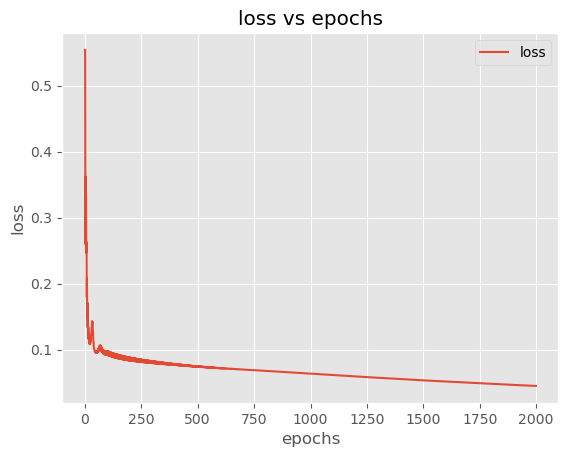

In [282]:
plot_graph(history,'loss')

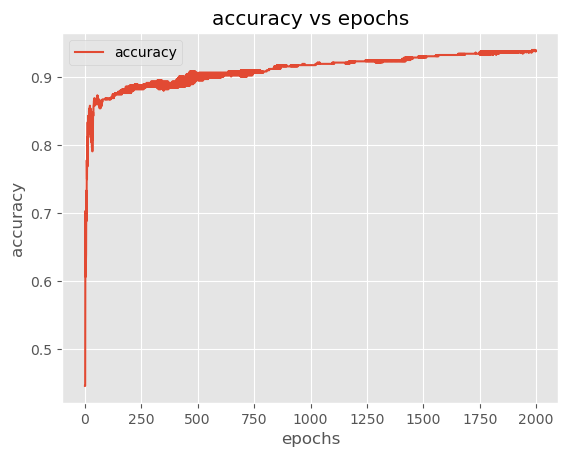

In [283]:
plot_graph(history,'accuracy')